In [2]:
import pandas as pd
import tweepy
import config
import csv


client = tweepy.Client(bearer_token=config.BEARER_TOKEN)
# Open/create a file to append data to
csvFile = open('result.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)
for tweet in client.search_recent_tweets(query="Microsoft lang:en -is:retweet", max_results=10).data:
    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.text.encode('utf-8')])
    
csvFile.close()

<AxesSubplot:>

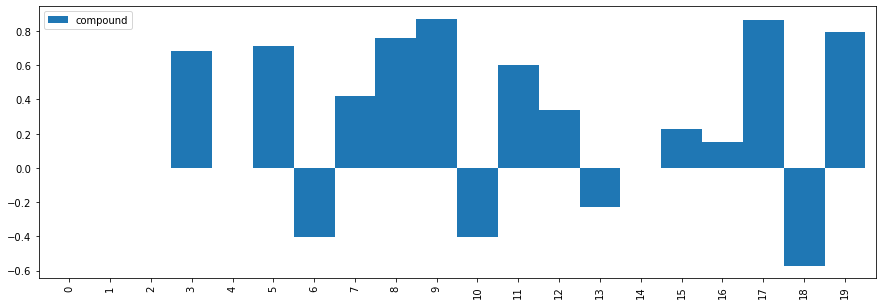

In [3]:
import config
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from ast import literal_eval
df = pd.read_csv('result.csv', header=None, dtype = str,names=["text"])

analyzer = SentimentIntensityAnalyzer()
tweetsWithSent = []

for t in df.text:
    ps = analyzer.polarity_scores(t)
    tweetsWithSent.append({'text': t, 'compound': ps['compound']})

tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15, 5), width=1)